In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dos dados

In [2]:
data = pd.read_csv("data/train.csv")
sobreviventes = data["Survived"]
data = data.drop(columns = {"Survived"})
data["Survived"] = sobreviventes

In [3]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Analisando correlações no dataset

In [6]:
##Correlação dos dados numéricos
data.corr(numeric_only = True)["Survived"]

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

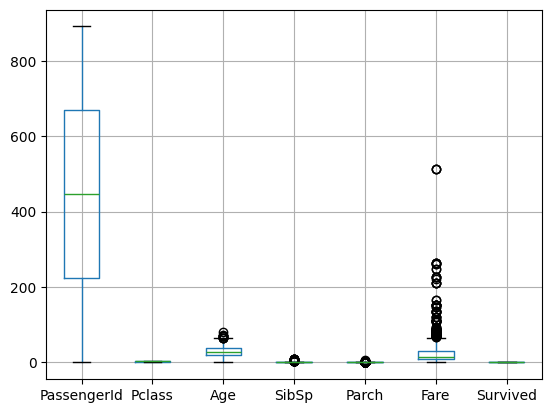

In [7]:
data.boxplot()
plt.show()

# Relação de sobreviventes com variáveis categóricas

## Sobreviventes por sexo

In [8]:
sobreviventes = data.groupby("Sex")["Survived"].sum()
sobreviventes

Sex
female    233
male      109
Name: Survived, dtype: int64

In [9]:
contagem_sexo = data["Sex"].value_counts()
contagem_sexo

Sex
male      577
female    314
Name: count, dtype: int64

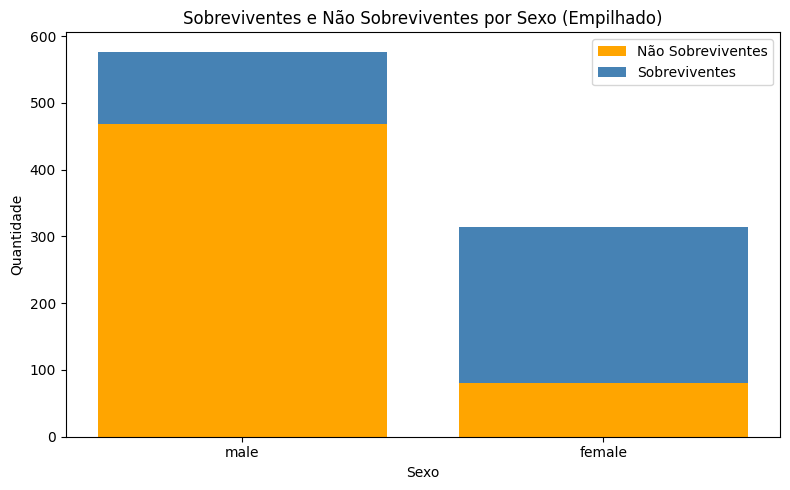

In [10]:
ordem = contagem_sexo.index
sobreviventes = data.groupby("Sex")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_sexo - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Sexo (Empilhado)")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()


## Sobreviventes por classe

In [11]:
sobreviventes = data.groupby("Pclass")["Survived"].sum()
sobreviventes

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [12]:
contagem_classe = data["Pclass"].value_counts()
contagem_classe

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

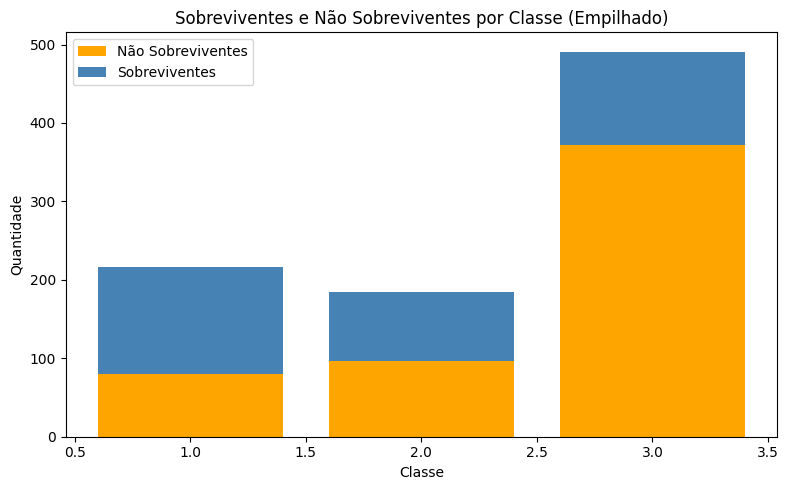

In [13]:
ordem = contagem_classe.index
sobreviventes = data.groupby("Pclass")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_classe - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Classe (Empilhado)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

## Sobreviventes x Local de embarque

In [14]:
sobreviventes = data.groupby("Embarked")["Survived"].sum()
sobreviventes

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [15]:
contagem_Embarked = data["Embarked"].value_counts()
contagem_Embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

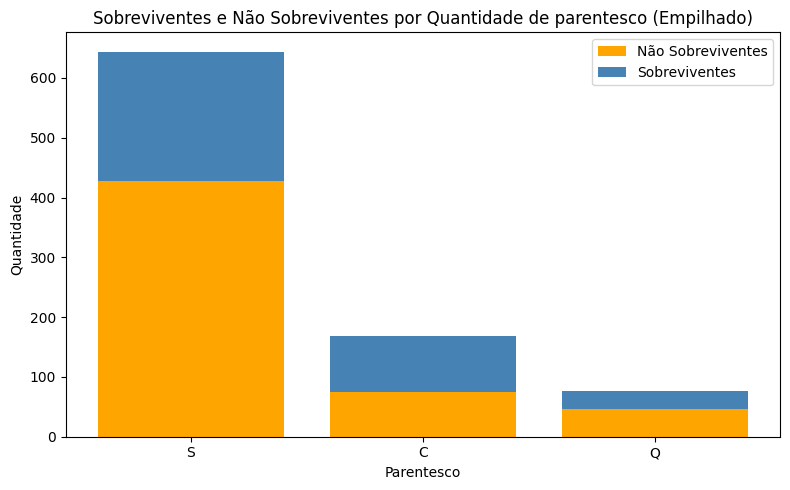

In [16]:
ordem = contagem_Embarked.index
sobreviventes = data.groupby("Embarked")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Embarked - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

# Relação de sobreviventes com variáveis não-categóricas

## Sobreviventes e parentesco

In [17]:
sobreviventes = data.groupby("SibSp")["Survived"].sum()
sobreviventes

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

In [18]:
contagem_Sibsp = data["SibSp"].value_counts()
contagem_Sibsp

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

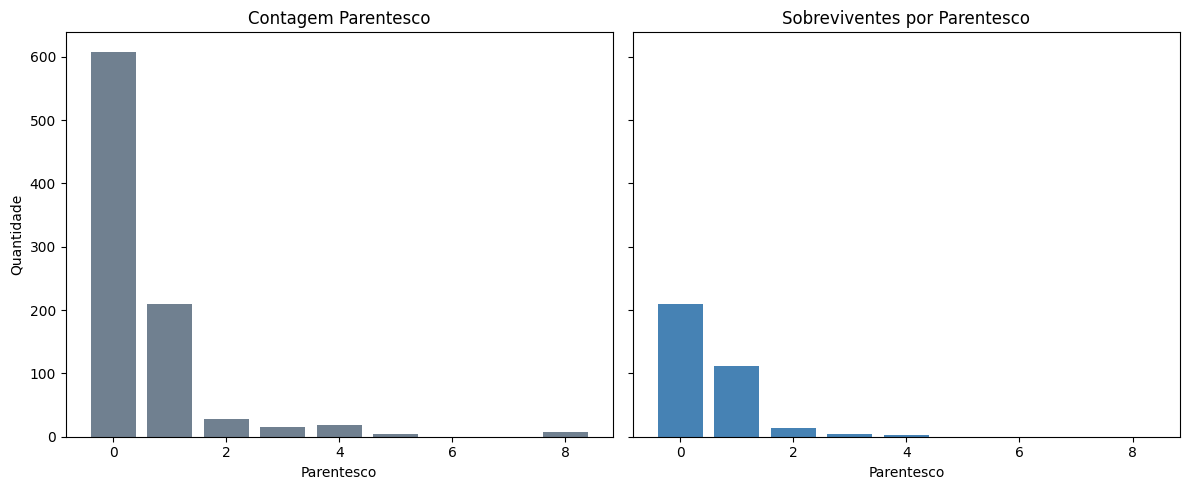

In [19]:
ordem = contagem_Sibsp.index
sobreviventes = data.groupby("SibSp")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Sibsp

# Criando dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma dos Não Sobreviventes
ax1.bar(ordem, nao_sobreviventes, color='slategray')
ax1.set_title("Contagem Parentesco")
ax1.set_xlabel("Parentesco")
ax1.set_ylabel("Quantidade")

# Histograma dos Sobreviventes
ax2.bar(ordem, sobreviventes, color='steelblue')
ax2.set_title("Sobreviventes por Parentesco")
ax2.set_xlabel("Parentesco")

plt.tight_layout()
plt.show()

In [20]:
sobreviventes = data.groupby("Parch")["Survived"].sum()
sobreviventes

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [21]:
contagem_Parch = data["Parch"].value_counts()
contagem_Parch

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

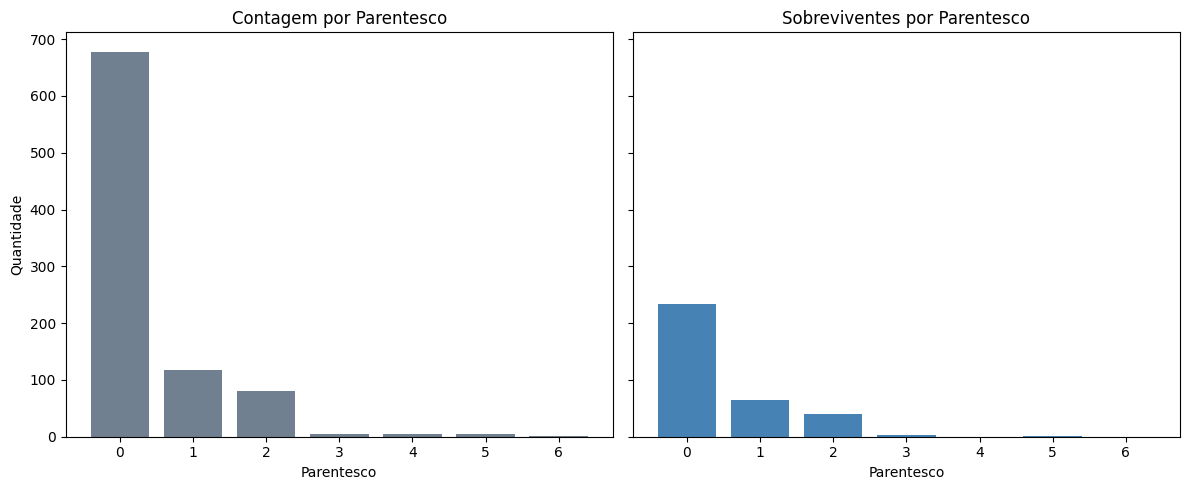

In [22]:
ordem = contagem_Parch.index
sobreviventes = data.groupby("Parch")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Parch

# Criando dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma dos Não Sobreviventes
ax1.bar(ordem, nao_sobreviventes, color='slategray')
ax1.set_title("Contagem por Parentesco")
ax1.set_xlabel("Parentesco")
ax1.set_ylabel("Quantidade")

# Histograma dos Sobreviventes
ax2.bar(ordem, sobreviventes, color='steelblue')
ax2.set_title("Sobreviventes por Parentesco")
ax2.set_xlabel("Parentesco")

plt.tight_layout()
plt.show()

## Distribuição de sobreviventes por idade

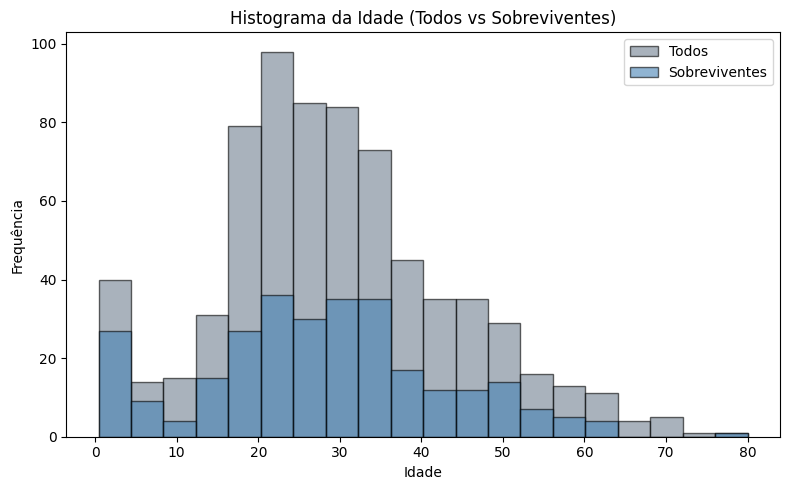

In [23]:
# Histograma combinado: todos + apenas sobreviventes
plt.figure(figsize=(8, 5))

# Todos os passageiros (com idade conhecida)
data["Age"].dropna().plot.hist(bins=20, edgecolor='black', color='slategray', alpha=0.6, label="Todos")

# Apenas sobreviventes
idades_sobreviveram = data[data["Survived"] == 1]["Age"].dropna()
plt.hist(idades_sobreviveram, bins=20, edgecolor='black', color='steelblue', alpha=0.6, label="Sobreviventes")

# Título e legendas
plt.title("Histograma da Idade (Todos vs Sobreviventes)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


## Fare x Sobreviventes

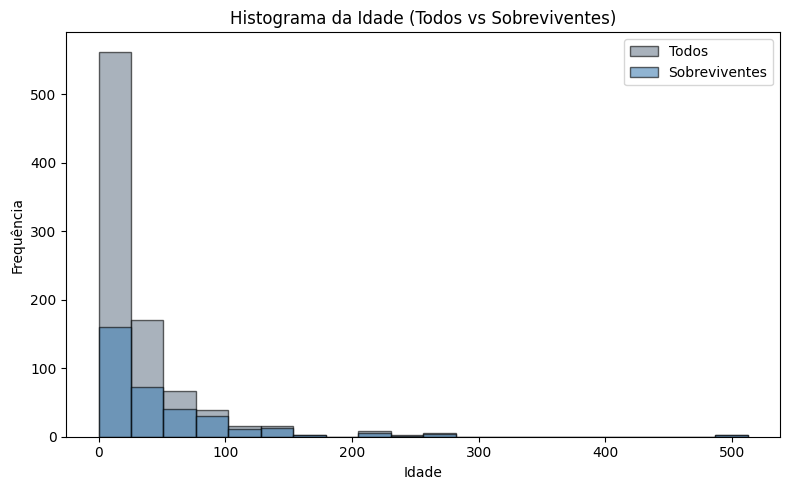

In [24]:
# Histograma combinado: todos + apenas sobreviventes
plt.figure(figsize=(8, 5))

# Todos os passageiros (com idade conhecida)
data["Fare"].dropna().plot.hist(bins=20, edgecolor='black', color='slategray', alpha=0.6, label="Todos")

# Apenas sobreviventes
idades_sobreviveram = data[data["Survived"] == 1]["Fare"].dropna()
plt.hist(idades_sobreviveram, bins=20, edgecolor='black', color='steelblue', alpha=0.6, label="Sobreviventes")

# Título e legendas
plt.title("Histograma da Idade (Todos vs Sobreviventes)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

## Testes de correlação

In [25]:
##Transformar tabelas em numéricas
data_mod = data.copy()
data_mod = pd.get_dummies(data_mod, columns=['Sex'], prefix='Sex')
data_mod = pd.get_dummies(data_mod, columns=['Embarked'], prefix='Embarked')

In [26]:
data_mod["Embarked_C"] = data_mod["Embarked_C"].map({True: 1, False: 0})
data_mod["Embarked_Q"] = data_mod["Embarked_Q"].map({True: 1, False: 0})
data_mod["Embarked_S"] = data_mod["Embarked_S"].map({True: 1, False: 0})
data_mod["Sex_male"] = data_mod["Sex_male"].map({True: 1, False: 0})
data_mod["Sex_female"] = data_mod["Sex_female"].map({True: 1, False: 0})

In [27]:
data_mod = data_mod.drop(columns = {"PassengerId", "Name", "Ticket", "Cabin"})

In [28]:
data_mod

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,NaN,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [29]:
correlacoes = data_mod.corr(method='pearson', numeric_only=True)

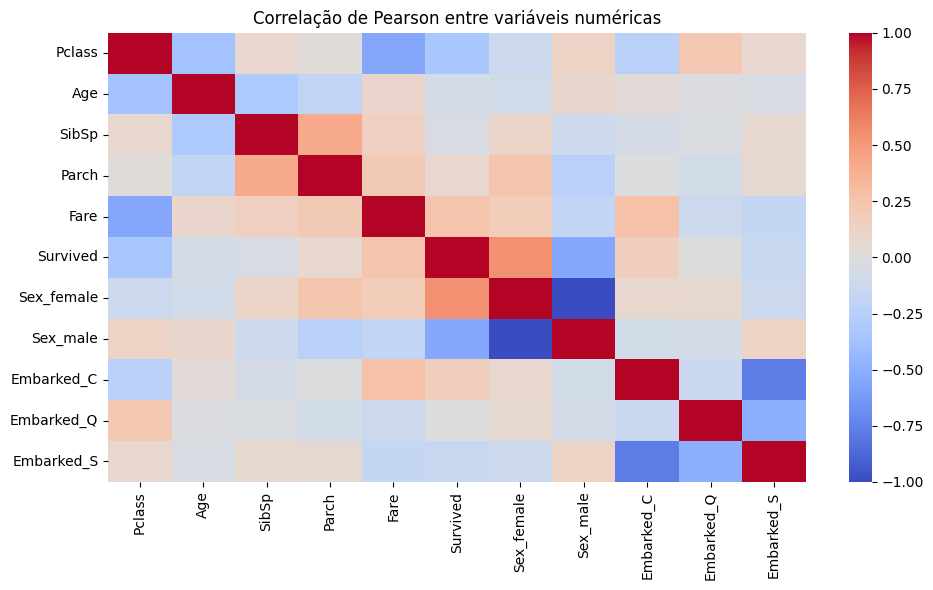

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlação de Pearson entre variáveis numéricas")
plt.tight_layout()
plt.show()

In [31]:
data_mod.groupby(['Survived','Sex_male'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Survived Sex_male                                                             
0        0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         1         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        0         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [32]:
data_mod.groupby(['Survived', 'Pclass'])['Age'].describe()

count       mean        std    min    25%    50%    75%   max
Survived Pclass                                                               
0        1        64.0  43.695312  15.284243   2.00  31.00  45.25  55.25  71.0
         2        90.0  33.544444  12.151581  16.00  25.00  30.50  39.00  70.0
         3       270.0  26.555556  12.334882   1.00  19.00  25.00  33.00  74.0
1        1       122.0  35.368197  13.760017   0.92  24.25  35.00  45.00  80.0
         2        83.0  25.901566  14.837787   0.67  17.50  28.00  34.00  62.0
         3        85.0  20.646118  11.995047   0.42  14.00  22.00  29.00  63.0

# Partindo para uma análise mais robusta...

In [33]:
data_mod2 = data.copy()
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [34]:
data_mod2["Name"] = data_mod2["Name"].str.extract(r',\s*([^\.]+)\.')

In [35]:
data_mod2["Name"].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

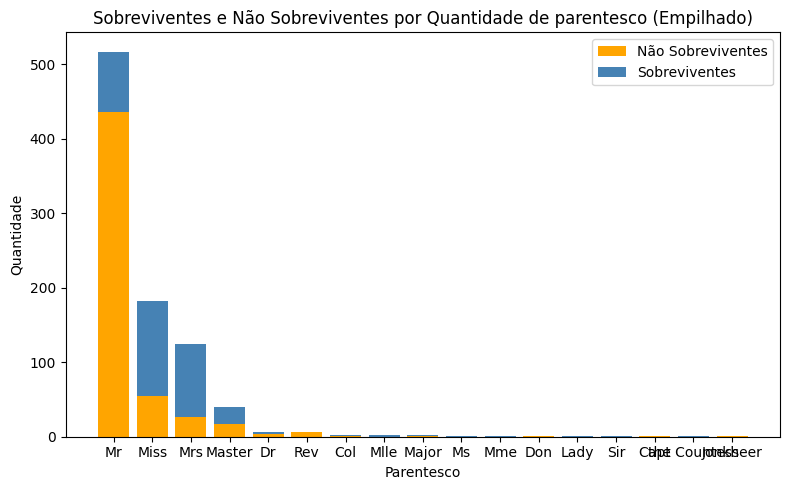

In [36]:
sobreviventes = data_mod2.groupby("Name")["Survived"].sum()
contagem_Name = data_mod2["Name"].value_counts()
ordem = contagem_Name.index
sobreviventes = data_mod2.groupby("Name")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Name - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

## Análise de Ticket

In [37]:
data["Cabin"].value_counts().head(30)

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
E101           3
C22 C26        3
F33            3
C83            2
C123           2
B28            2
D26            2
B58 B60        2
E33            2
D33            2
C52            2
F G73          2
B77            2
C93            2
B5             2
D17            2
E24            2
E8             2
E121           2
B35            2
E44            2
C92            2
C78            2
B20            2
C125           2
Name: count, dtype: int64

In [38]:
data_mod2['Cabin_Multiple'] = data_mod2['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_Multiple
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,Mr,male,26.0,0,0,111369,30.0000,C148,C,1,1


In [39]:
data_mod2["Cabin_Multiple"].value_counts()

Cabin_Multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

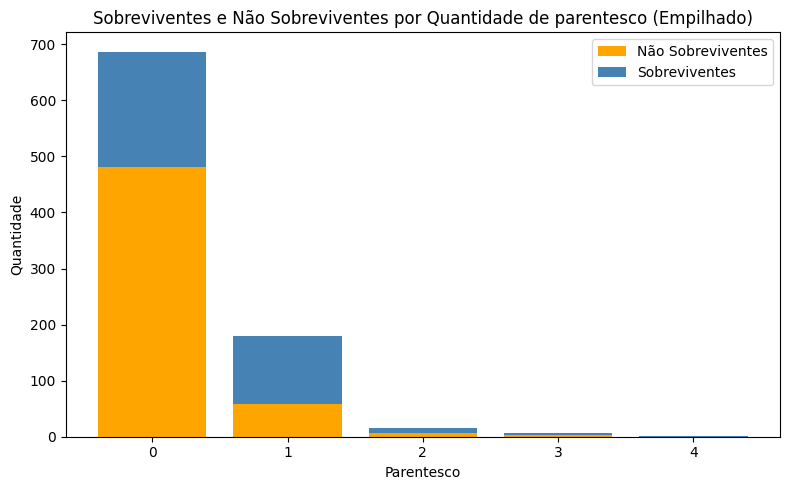

In [40]:
sobreviventes = data_mod2.groupby("Cabin_Multiple")["Survived"].sum()
contagem_Name = data_mod2["Cabin_Multiple"].value_counts()
ordem = contagem_Name.index
sobreviventes = data_mod2.groupby("Cabin_Multiple")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Name - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
data_mod2['Cabin_Pref'] = data_mod2['Cabin'].apply(lambda x: str(x)[0])

In [42]:
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_Multiple,Cabin_Pref
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,n
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,1,C
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,0,n
887,888,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,1,B
888,889,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,n
889,890,1,Mr,male,26.0,0,0,111369,30.0000,C148,C,1,1,C


In [43]:
data_mod2['Cabin_Pref'].value_counts()

Cabin_Pref
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

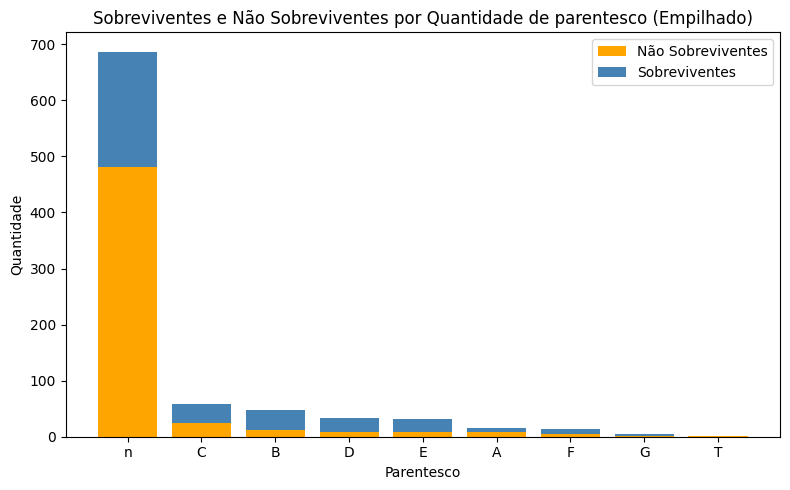

In [44]:
sobreviventes = data_mod2.groupby("Cabin_Pref")["Survived"].sum()
contagem_Name = data_mod2["Cabin_Pref"].value_counts()
ordem = contagem_Name.index
sobreviventes = data_mod2.groupby("Cabin_Pref")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Name - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_Multiple,Cabin_Pref
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,n
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,1,C
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,0,n
887,888,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,1,B
888,889,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,n
889,890,1,Mr,male,26.0,0,0,111369,30.0000,C148,C,1,1,C


In [46]:
data_mod2['Numeric_Ticket'] = data_mod2["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)
data_mod2['Numeric_Ticket'].value_counts()

Numeric_Ticket
1    661
0    230
Name: count, dtype: int64

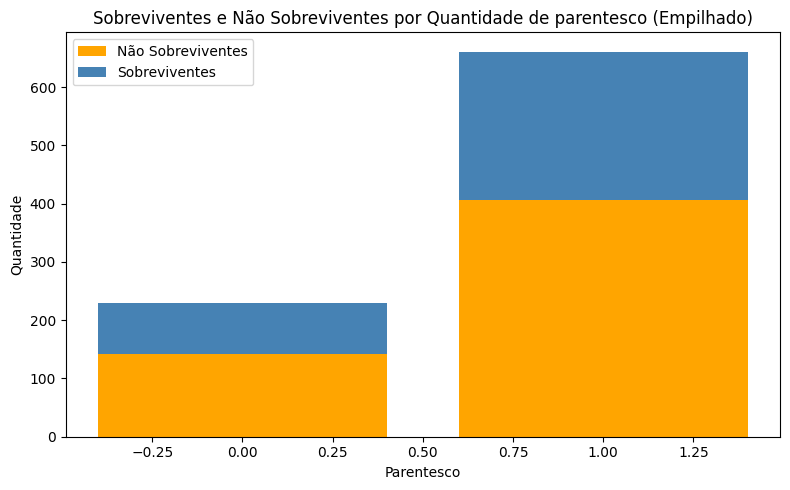

In [47]:
sobreviventes = data_mod2.groupby("Numeric_Ticket")["Survived"].sum()
contagem_Name = data_mod2["Numeric_Ticket"].value_counts()
ordem = contagem_Name.index
sobreviventes = data_mod2.groupby("Numeric_Ticket")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Name - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

## Transformar em numérico e rever correalções com sobreviventes

In [48]:
data_mod2 = pd.get_dummies(data_mod2, columns=['Sex'], prefix='Sex')
data_mod2 = pd.get_dummies(data_mod2, columns=['Name'], prefix='Name')
data_mod2 = pd.get_dummies(data_mod2, columns=['Embarked'], prefix='Embarked')
data_mod2 = pd.get_dummies(data_mod2, columns=['Cabin_Pref'], prefix='Cabin_Pref')

In [49]:
data_mod2 = data_mod2.drop(columns = {"PassengerId", "Ticket", "Cabin"})

In [54]:
data_mod2.corr(numeric_only = True)["Survived"].sort_values(ascending = False)

Survived             1.000000
Sex_female           0.543351
Name_Mrs             0.339040
Name_Miss            0.327093
Cabin_Multiple       0.277053
Fare                 0.257307
Cabin_Pref_B         0.175095
Embarked_C           0.168240
Cabin_Pref_D         0.150716
Cabin_Pref_E         0.145321
Cabin_Pref_C         0.114652
Name_Master          0.085221
Parch                0.081629
Name_Mlle            0.060095
Cabin_Pref_F         0.057935
Name_Lady            0.042470
Name_Mme             0.042470
Name_Ms              0.042470
Name_the Countess    0.042470
Name_Sir             0.042470
Cabin_Pref_A         0.022287
Cabin_Pref_G         0.016040
Name_Major           0.011329
Name_Col             0.011329
Name_Dr              0.008185
Embarked_Q           0.003650
Numeric_Ticket       0.001492
Cabin_Pref_T        -0.026456
Name_Don            -0.026456
Name_Jonkheer       -0.026456
Name_Capt           -0.026456
SibSp               -0.035322
Name_Rev            -0.064988
Age       

In [61]:
correlacoes = data_mod2.corr(method='pearson', numeric_only = True)["Survived"].sort_values(ascending = False)
correlacoes

Survived             1.000000
Sex_female           0.543351
Name_Mrs             0.339040
Name_Miss            0.327093
Cabin_Multiple       0.277053
Fare                 0.257307
Cabin_Pref_B         0.175095
Embarked_C           0.168240
Cabin_Pref_D         0.150716
Cabin_Pref_E         0.145321
Cabin_Pref_C         0.114652
Name_Master          0.085221
Parch                0.081629
Name_Mlle            0.060095
Cabin_Pref_F         0.057935
Name_Lady            0.042470
Name_Mme             0.042470
Name_Ms              0.042470
Name_the Countess    0.042470
Name_Sir             0.042470
Cabin_Pref_A         0.022287
Cabin_Pref_G         0.016040
Name_Major           0.011329
Name_Col             0.011329
Name_Dr              0.008185
Embarked_Q           0.003650
Numeric_Ticket       0.001492
Cabin_Pref_T        -0.026456
Name_Don            -0.026456
Name_Jonkheer       -0.026456
Name_Capt           -0.026456
SibSp               -0.035322
Name_Rev            -0.064988
Age       

In [67]:
#Se for adotado um limiar de correlação:
correlacoes = correlacoes[correlacoes.abs() > 0.1]
correlacoes

Survived          1.000000
Sex_female        0.543351
Name_Mrs          0.339040
Name_Miss         0.327093
Cabin_Multiple    0.277053
Fare              0.257307
Cabin_Pref_B      0.175095
Embarked_C        0.168240
Cabin_Pref_D      0.150716
Cabin_Pref_E      0.145321
Cabin_Pref_C      0.114652
Embarked_S       -0.155660
Cabin_Pref_n     -0.316912
Pclass           -0.338481
Sex_male         -0.543351
Name_Mr          -0.549199
Name: Survived, dtype: float64